In [208]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.cluster import DBSCAN
import treelib
import pyclust
from sklearn.cluster import hierarchical
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
import csv
import math
from random import randint
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import chisquare
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import calinski_harabaz_score
from math import pi

In [77]:
def elbow_method(X):
    '''
    Using elbow method to find the best k of the kmeans.
    X is feature matrix.
    '''
    # distortions = []
    distorsion = []
    K = range(2,15)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X)   
        distorsion.append(kmeanModel.inertia_)
    
    fig = plt.figure(figsize=(15, 5))
    plt.grid(True)
    plt.plot(range(2, 15), distorsion)
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.savefig('The Elbow Method showing the optimal k')
    plt.show()

In [78]:
def silhouette_score_analysis(X):
    ''' 
    Do silhouette analysis and make plots 
    X : feature matrix 
    
    '''
    avr_ss = []
    range_n_clusters = range(2,10)
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        avr_ss.append(silhouette_avg)

    K = range_n_clusters
#     plt.grid(True)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.plot(K, avr_ss, 'bx-')
    ax1.grid(True)
    ax1.set_xlabel('Number of Clusters',fontsize = 15)
    ax1.set_ylabel('Average Silhouette Score',fontsize =15)
    link ='ward'
    ac = AgglomerativeClustering(linkage=link, n_clusters=4)
    ac.fit(X)
# Hierarchical clustering
    Z = hierarchy.linkage(X, 'ward')
    ax2 = hierarchy.dendrogram(Z,leaf_rotation=90.,  # rotates the x axis 
                         leaf_font_size=8.,  # font size for the x axis labels
                         color_threshold =4,no_labels =True)

    plt.xlabel('Case ID',fontsize = 15,labelpad =20)
    plt.ylabel('Distance',fontsize = 15)
    plt.show()

    plt.savefig('The Silhouette score with different k')
   

In [210]:
def cal_avg(data):
    result = []
    total = [0 for i in range(len(data[0][0]))]
    for da in data:
        oneline = [0 for i in range(len(da[0]))]
        max_ele = [0 for i in range(len(da[0]))]
        for i in range(len(da)):
            for j in range(len(da[i])):
                oneline[j] = oneline[j] + int(da[i][j])
                total[j] = total[j] + int(da[i][j])
                if int(da[i][j]) > max_ele[j]:
                    max_ele[j] = int(da[i][j])
        for i in range(len(oneline)):
            if oneline[i]!=0:
                oneline[i] = oneline[i]/float(max_ele[i])/float(len(da))
        result.append(oneline)
    for i in range(len(total)):
        total[i] = total[i] / float(123)
    return result, total



def radar(cat, data):
    '''
    category: attributes' names
    data: shape: 3d-list
    '''
#     index that weight is non zero
    diff = diff=[4,5,6,7,8,9,10,15,17,21,23]
    number = [55,13,49,6]
    colors = ['#5a9c4b', '#d58edc', '#5dc2c4', '#ec615c', 'm']
    colors = colors[:len(data)]
    each_group, total = cal_avg(data)

    new_cat = []
    new_each_group = [[] for i in range(len(each_group))]
    new_total = []
    for i in range(len(cat)):
        if i in diff:
            new_cat.append(cat[i])
            new_total.append(total[i])
    for i in range(len(each_group)):
        for j in range(len(each_group[i])):
            if j in diff:
                new_each_group[i].append(each_group[i][j])
    #total = new_total
    each_group = new_each_group
    cat = new_cat
    N = len(cat)
    for values, color, ii in zip(each_group, colors, range(len(data))):
        plt.figure(ii+2, figsize=(9,7))

        x_as = [n / float(N) * 2 * pi for n in range(N)]

        # Because our chart will be circular we need to append a copy of the first
        # value of each list at the end of each list with data
        values += values[:1]
        x_as += x_as[:1]

        # Set color of axes
        plt.rc('axes', linewidth=0.5, edgecolor="#888888")

        # Create polar plot
        ax = plt.subplot(111, polar=True)
#         ax.set_size_inches(9, 7)
        # Set clockwise rotation. That is:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        # Set color and linestyle of grid
        ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
        ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
        



        # Set number of radial axes and remove labels
        plt.xticks(x_as[:-1], [])

        # Set yticks
        plt.yticks([0.2, 0.4, 0.6, 0.8, 1], ["0.2", "0.4", "0.6", "0.8", "1"])

        # Plot data
        ax.plot(x_as, values, color, linewidth=1.5, linestyle='solid', zorder=3)

        # Fill area
        ax.fill(x_as, values, color, alpha=0.45)

        # Set axes limits
        plt.ylim(0, 1)

        # Draw ytick labels to make sure they fit properly
        for i in range(N):
            angle_rad = i / float(N) * 2 * pi

            if angle_rad == 0:
                ha, distance_ax = "center", 1
            elif 0 < angle_rad < pi:
                ha, distance_ax = "left", 1
            elif angle_rad == pi:
                ha, distance_ax = "center", 1
            else:
                ha, distance_ax = "right", 1

            ax.text(angle_rad,  0.08  + distance_ax, cat[i], size=15, horizontalalignment=ha, verticalalignment="center")

        font = {'family': 'serif',
            'color':  colors[ii],
            'weight': 'normal',
            'size': 25}
        plt.text(0.25, 1.25, 'Cohort '+ str(ii)+' (' +str(number[ii]) +')', fontdict = font)
        plt.show()

In [211]:
def main(filename):
    '''
    first: explore optimal number of clusters
    second: visualize kmeans and hierarchical clustering 
    @Parameter
    filename: the name of a csv file
    w: learnt weights for feature
    k: number of clusters for k means
    '''
    # filename = "Normalized_attributes.csv"
    w = [0.0, 0.0, 0.0, 0.0, 0.1428571428571428, 1.0, 1.3095238095238089, 0.8095238095238084, 0.0, 0.8095238095238084, 1.0, 0.0, 0.0, 0.0, 0.0, 0.1428571428571428, 0.0, 0.1428571428571428, 0.0, 0.0, 0.0, 2.3928571428571423, 0.0, 
    0.25, 0.0, 0.0]
    k =4
    data = pd.read_csv(filename)
    data.drop('Unnamed: 0',axis =1,inplace=True)
    data
    feature = np.array(data.drop('id',axis =1,inplace=False))
    weighted_feature = (w * feature)
    X = weighted_feature
    elbow_method(X)
    
    range_n_clusters = [ 3,4 ]

    for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        y_lower = 10

        clusterer_1 = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels_1 = clusterer_1.fit_predict(feature)
        X_1 = PCA(n_components=2).fit_transform(feature)
        colors = ['#5a9c4b', '#d58edc',  '#ec615c','#5dc2c4']
        markers =['X','o','^','d'];
        for i in range(len(X_1)):
            ax1.scatter(X_1[i, 0], X_1[i, 1], marker=markers[cluster_labels_1[i]], s=100, lw=0, alpha=1,
                    c= colors[cluster_labels_1[i]], edgecolor='k')
        ax1.set_xlabel("Feature projection to x feature space",fontsize=15,labelpad= 10)
        ax1.set_ylabel("Feature projection to y feature space",fontsize=15,labelpad= 10)
    
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
        X = PCA(n_components=2).fit_transform(weighted_feature)

        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        colors = ['#5a9c4b', '#d58edc', '#5dc2c4', '#ec615c']
        markers =['X','o','d','^'];
        for i in range(len(X)):
            ax2.scatter(X[i, 0], X[i, 1], marker=markers[cluster_labels[i]], s=100, lw=0, alpha=0.95,
                c= colors[cluster_labels[i]], edgecolor='k')

    # Labeling the clusters
        centers = clusterer.cluster_centers_

        ax2.set_xlabel("Feature projection to x feature space",fontsize=15,labelpad= 10)
        ax2.set_ylabel("Feature projection to y feature space",fontsize=15,labelpad= 10)
        
        
        plt.show()
        plt.savefig("kmeans_k_" +str(n_clusters) )

        
        kml = pd.read_csv('km_label.csv')
        kl = list(kml['labels'])
        group_member =[]
        attr_no_ids =[]
        for k in range(0,4):
            id_list =[]
            attr=[]
            for i in range(len(data)):   
                if(kl[i] == k):
                    id_list.append(int(data.iloc[i]['id']))
                    attr.append(feature[i])
            group_member.append(id_list)
            attr_no_ids.append(attr)
        
        attr_names =data.columns[1:]
        radar(attr_names,attr_no_ids)

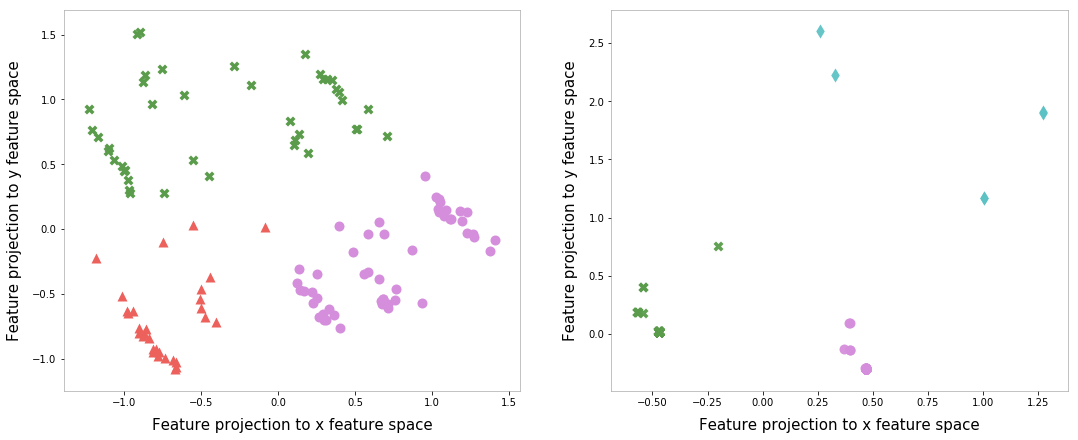

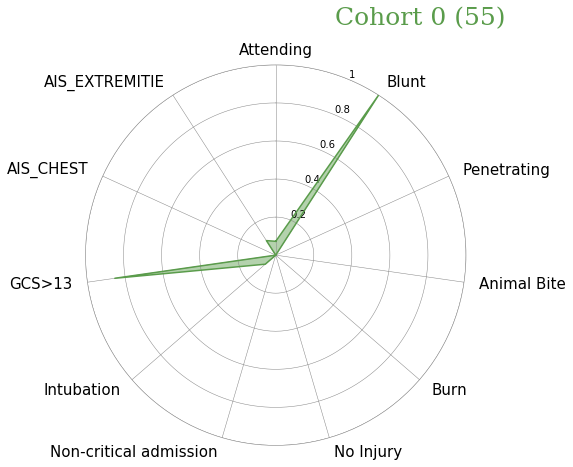

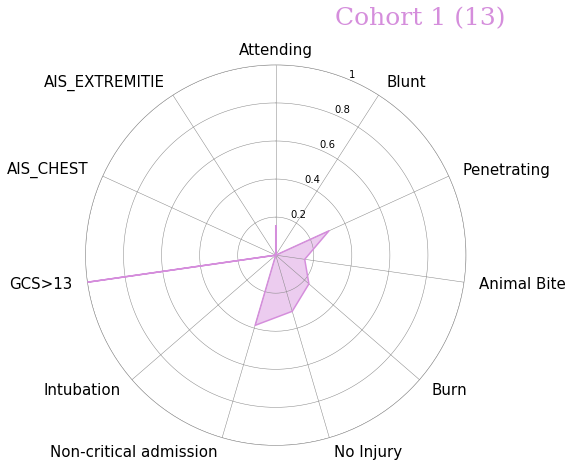

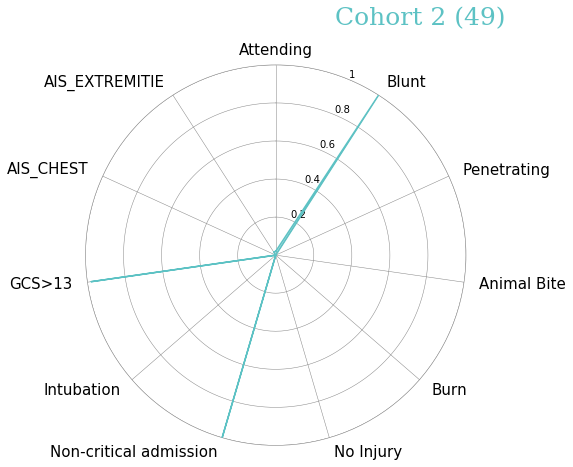

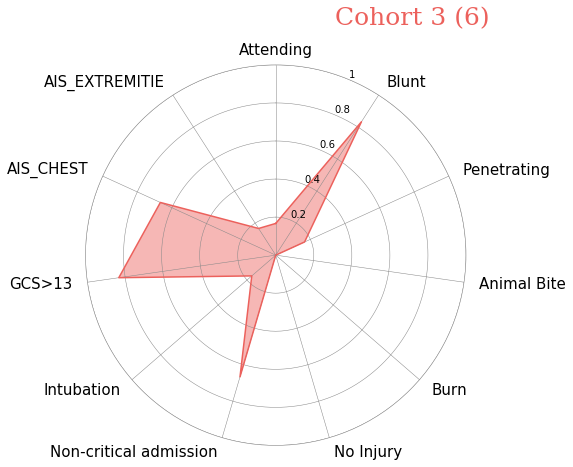

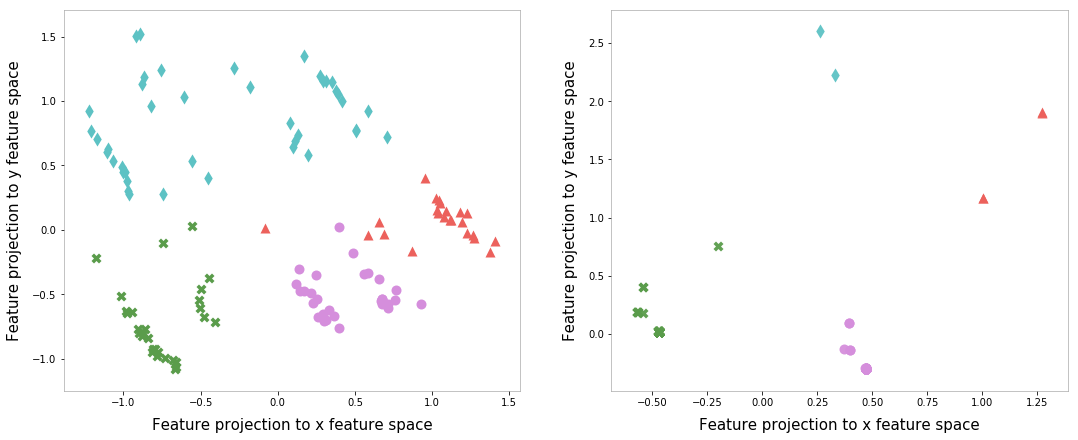

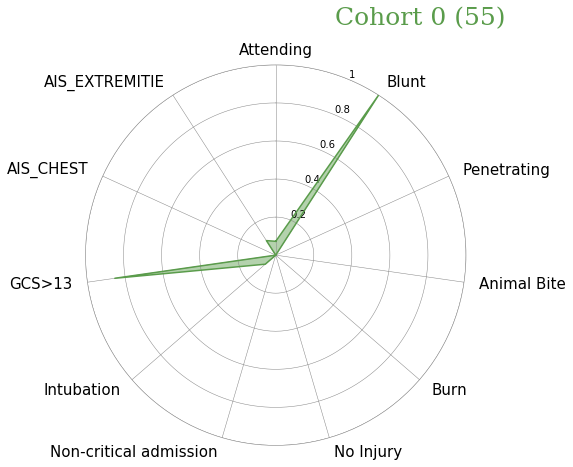

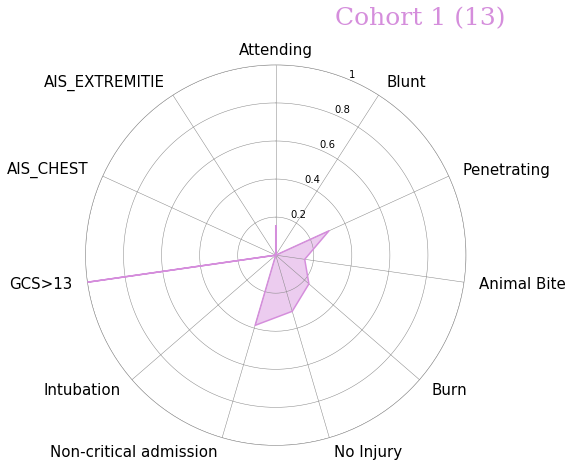

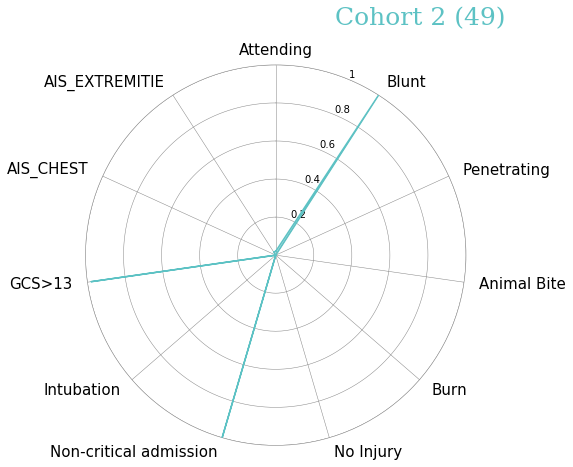

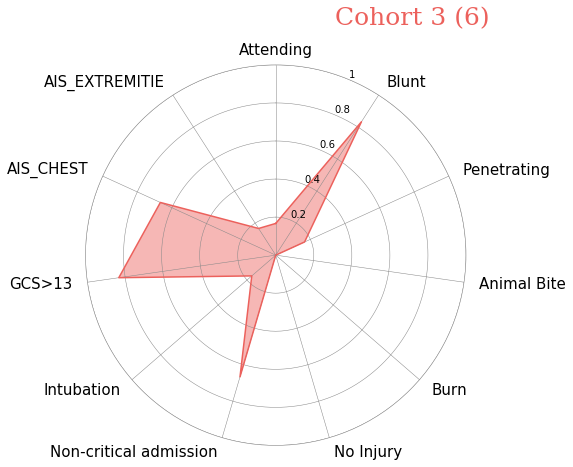

In [213]:
if __name__ =='__main__':
    filename = "Normalized_attributes.csv"
    
    main(filename)